In [1]:
#imports
#definindo variaveis do sympy
#definindo a função

from sympy import *
import matplotlib.pyplot as plt
import numpy as np

x = Symbol('x')

f = Lambda(x, -9.81*x**2/2) # definindo a função

hfont = {'fontname':'Helvetica'}

In [2]:
#definindo o intervalo a ser estudado
#definindo a quantidade de pontos a serem estudados

x0 = 0 #ponto inicial
xf = 3 #ponto final
q = 10000 #qnt max de pontos

x_ = np.linspace(x0,xf,q)
x__ = []
v = []
dom = []
im =[]

In [3]:
if (f(x).subs(x, x_[0])).is_real:
    x__.append(x_[0])
    v.append(f(x).subs(x, x_[0]))
for i in range(1,q):
    if (f(x).subs(x, x_[i])).is_real and (f(x).subs(x, x_[i-1])).is_real:
        m = Abs(f(x).subs(x, x_[i])-f(x).subs(x, x_[i-1]))
        if m < 10 and v != []:
            x__.append(x_[i])
            v.append(f(x).subs(x, x_[i]))
        else:
            dom.append(x__)
            im.append(v)
            v = []
            x__ = []
            x__.append(x_[i])
            v.append(f(x).subs(x, x_[i]))
            continue
    if f(x).subs(x, x_[i]) == nan or not (f(x).subs(x, x_[i])).is_real:
        if v != []:
            dom.append(x__)
            im.append(v)
        v = []
        x__ = []
        continue

dom.append(x__)
im.append(v)
l = len(dom)

#print(dom)
#print(im)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


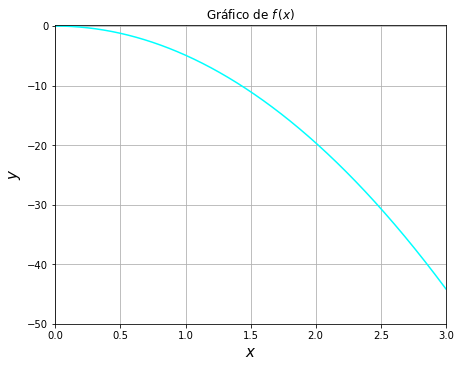

In [4]:
figura = plt.figure(figsize=(7,5.5)) #tamanho da figura
ax = figura.add_subplot(111)

ax.autoscale(enable=True, axis='both', tight=None)
#ax.set_box_aspect(aspect=0.075)
ax.set_xlim(left=0, right=3) #margens x
ax.set_ylim(bottom=-50, top =0.2) #margens y


ax.set_title(r'Gráfico de $f\,(x)$')

ax.grid(visible=True,which="both",axis="both")
ax.set_ylabel(r"$y$",fontsize=15, **hfont)
ax.set_xlabel(r"$x$",fontsize=15, **hfont)

for i in range(l):
    ax.plot(dom[i],im[i], color = 'cyan')
plt.savefig('Gráfico f(x).png', dpi=300, bbox_inches='tight') #salvar
plt.box(on=True)

plt.show()